https://www.youtube.com/watch?v=DH6J4QrgEcs&list=PL9mhQYIlKEhfBKFj3HYWwk-jQlV8aNwgk&index=6
https://www.kaggle.com/code/headsortails/pytanic

In [13]:
#!pip install statsmodels
#!pip install lightgbm
#!pip install mlxtend

1. Load Data and Modules

In [11]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from scipy import stats
import sklearn as sk
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
import xgboost as xgb
import lightgbm as lgb
from mlxtend.classifier import StackingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

sns.set(style='white', context='notebook', palette='deep')

In [12]:
train = pd.read_csv("./titanic/train.csv")
test = pd.read_csv("./titanic/test.csv")
combine = pd.concat([train.drop('Survived',1),test])

# 2. Initial Exploration

In [14]:
train.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [15]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Missing values

In [16]:
print(train.isnull().sum())
print(test.info())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [17]:
surv = train[train['Survived']==1]
nosurv = train[train['Survived']==0]
surv_col = "blue"
nosurv_col = "red"

print("Survived: %i (%.1f percent), Not Survived: %i (%.1f percent), Total: %i"\
      %(len(surv), 1.*len(surv)/len(train)*100.0,\
        len(nosurv), 1.*len(nosurv)/len(train)*100.0, len(train)))

Survived: 342 (38.4 percent), Not Survived: 549 (61.6 percent), Total: 891


Median age survivors: 28.0, Median age non-survivers: 28.0


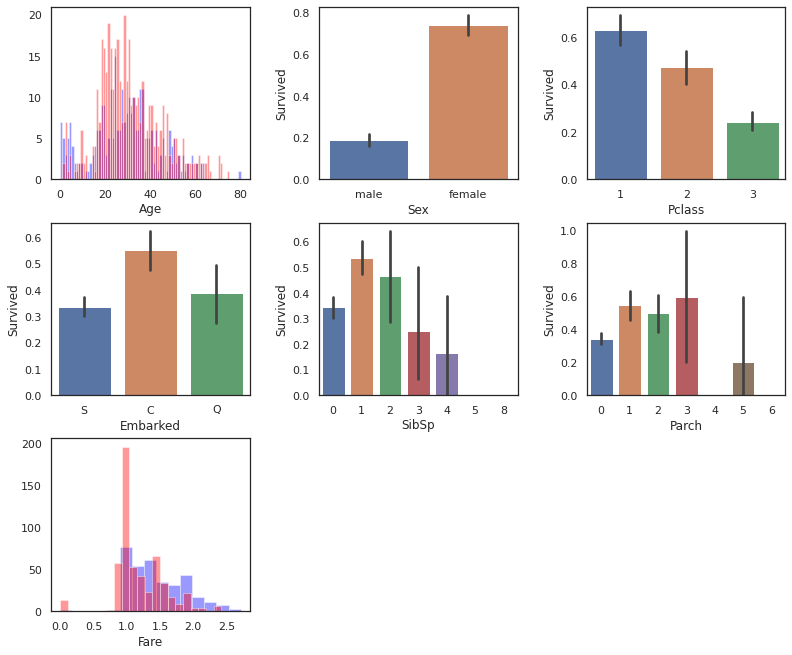

In [18]:
warnings.filterwarnings(action="ignore")
plt.figure(figsize=[12,10])
plt.subplot(331)
sns.distplot(surv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=surv_col)
sns.distplot(nosurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=nosurv_col,
            axlabel='Age')
plt.subplot(332)
sns.barplot('Sex', 'Survived', data=train)
plt.subplot(333)
sns.barplot('Pclass', 'Survived', data=train)
plt.subplot(334)
sns.barplot('Embarked', 'Survived', data=train)
plt.subplot(335)
sns.barplot('SibSp', 'Survived', data=train)
plt.subplot(336)
sns.barplot('Parch', 'Survived', data=train)
plt.subplot(337)
sns.distplot(np.log10(surv['Fare'].dropna().values+1), kde=False, color=surv_col)
sns.distplot(np.log10(nosurv['Fare'].dropna().values+1), kde=False, color=nosurv_col,axlabel='Fare')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

print("Median age survivors: %.1f, Median age non-survivers: %.1f"\
      %(np.median(surv['Age'].dropna()), np.median(nosurv['Age'].dropna())))

In [19]:
tab = pd.crosstab(train['SibSp'], train['Survived'])
print(tab)

Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0


In [21]:
stats.binom_test(x=5,n=5,p=0.62)
# p-value – 가설 검정의 p- 값 float 이것은 양면 대안으로 scipy.stats.binom_test를 사용합니다.

0.16417601599999998

#### Cabin numbers

In [22]:
print("We know %i of %i Cabin numbers in the training data set and"
      %(len(train['Cabin'].dropna()), len(train)))
print("we know %i of %i Cabin numbers in the testing data set."
      %(len(test['Cabin'].dropna()), len(test)))
train.loc[:,['Survived','Cabin']].dropna().head(8)

We know 204 of 891 Cabin numbers in the training data set and
we know 91 of 418 Cabin numbers in the testing data set.


,Survived,Cabin
1,1,C85
3,1,C123
6,0,E46
10,1,G6
11,1,C103
21,1,D56
23,1,A6
27,0,C23 C25 C27


#### Ticket numbers

In [23]:
print("There are %i unique ticket numbers among the %i tickets." \
      %(train['Ticket'].nunique(),train['Ticket'].count()))

There are 681 unique ticket numbers among the 891 tickets.


In [24]:
grouped = train.groupby('Ticket')
k = 0
for name, group in grouped:
    if (len(grouped.get_group(name)) > 1):
        print(group.loc[:,['Survived','Name', 'Fare']])
        k += 1
    if (k>10):
        break

     Survived                                               Name  Fare
257         1                               Cherry, Miss. Gladys  86.5
504         1                              Maioni, Miss. Roberta  86.5
759         1  Rothes, the Countess. of (Lucy Noel Martha Dye...  86.5
     Survived                                    Name   Fare
262         0                       Taussig, Mr. Emil  79.65
558         1  Taussig, Mrs. Emil (Tillie Mandelbaum)  79.65
585         1                     Taussig, Miss. Ruth  79.65
     Survived                            Name  Fare
110         0  Porter, Mr. Walter Chamberlain  52.0
475         0     Clifford, Mr. George Quincy  52.0
     Survived                                             Name     Fare
329         1                     Hippach, Miss. Jean Gertrude  57.9792
523         1  Hippach, Mrs. Louis Albert (Ida Sophia Fischer)  57.9792
     Survived                                    Name  Fare
166         1  Chibnall, Mrs. (Edith Mar

3. Relations between features

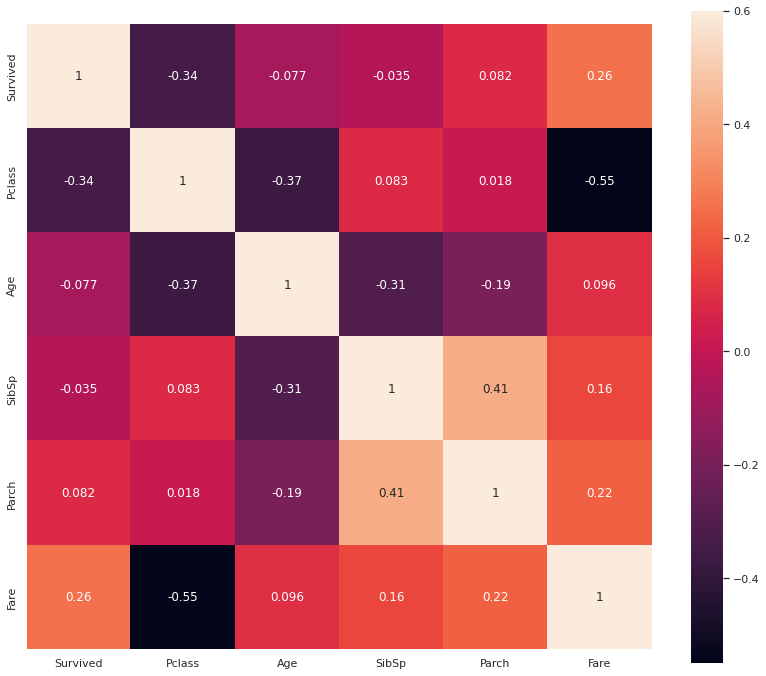

In [25]:
plt.figure(figsize=(14,12))
foo = sns.heatmap(train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

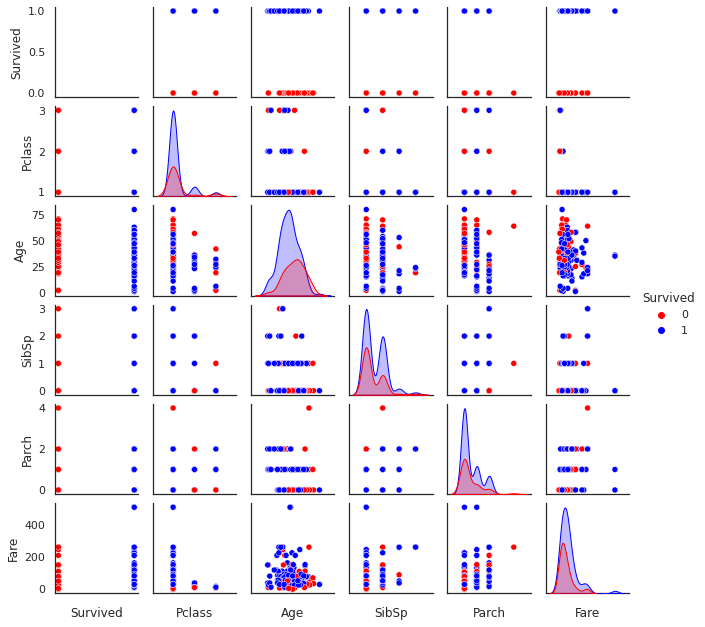

In [26]:
cols = ['Survived','Pclass','Age','SibSp','Parch','Fare']
g = sns.pairplot(data=train.dropna(), vars=cols, size=1.5,
                 hue='Survived', palette=[nosurv_col,surv_col])
g.set(xticklabels=[])

<AxesSubplot:xlabel='Male Age'>

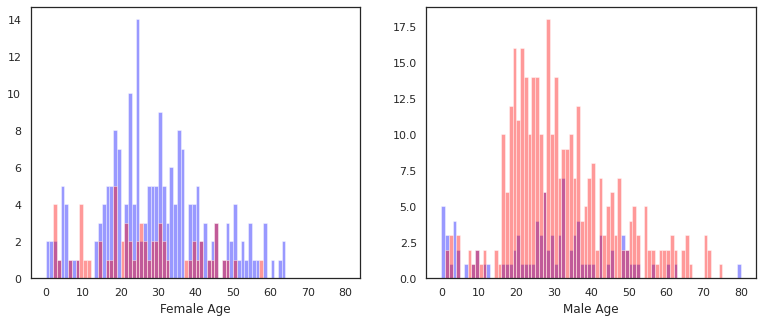

In [27]:
msurv = train[(train['Survived']==1) & (train['Sex']=="male")]
fsurv = train[(train['Survived']==1) & (train['Sex']=="female")]
mnosurv = train[(train['Survived']==0) & (train['Sex']=="male")]
fnosurv = train[(train['Survived']==0) & (train['Sex']=="female")]

plt.figure(figsize=[13,5])
plt.subplot(121)
sns.distplot(fsurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=surv_col)
sns.distplot(fnosurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=nosurv_col,
            axlabel='Female Age')
plt.subplot(122)
sns.distplot(msurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=surv_col)
sns.distplot(mnosurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=nosurv_col,
            axlabel='Male Age')

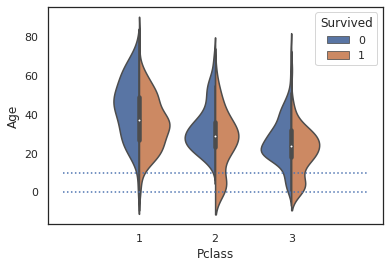

In [28]:
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train, split=True)
plt.hlines([0,10], xmin=-1, xmax=3, linestyles="dotted")

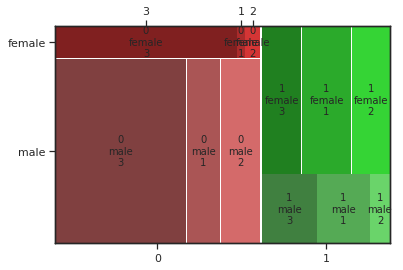

In [29]:
dummy = mosaic(train,["Survived","Sex","Pclass"])

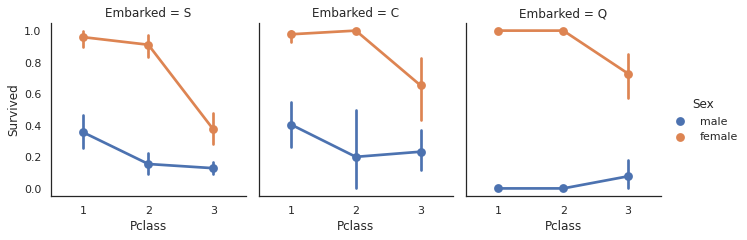

In [30]:
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", col="Embarked",
                   data=train, aspect=0.9, size=3.5, ci=95.0)

Pclass      1    2    3
Embarked               
C         141   28  101
Q           3    7  113
S         177  242  495


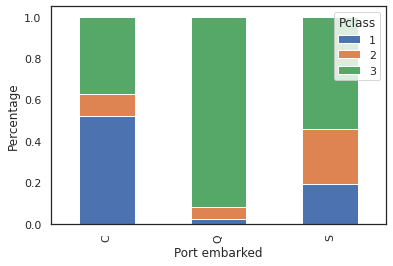

In [31]:
tab = pd.crosstab(combine['Embarked'], combine['Pclass'])
print(tab)
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Port embarked')
dummy = plt.ylabel('Percentage')

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

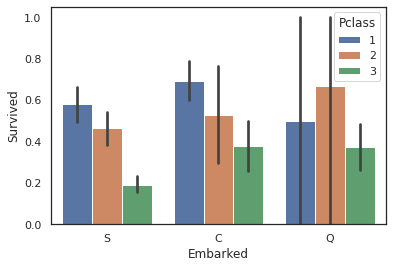

In [32]:
sns.barplot(x="Embarked", y="Survived", hue="Pclass", data=train)

Sex       female  male
Embarked              
C            113   157
Q             60    63
S            291   623


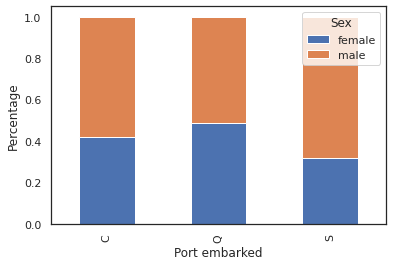

In [33]:
tab = pd.crosstab(combine['Embarked'], combine['Sex'])
print(tab)
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Port embarked')
dummy = plt.ylabel('Percentage')

Sex     female  male
Pclass              
1          144   179
2          106   171
3          216   493


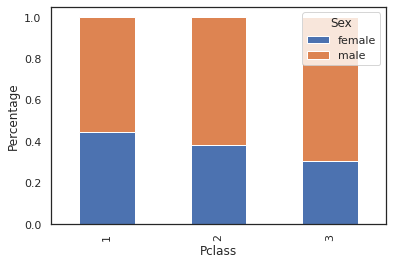

In [34]:
tab = pd.crosstab(combine['Pclass'], combine['Sex'])
print(tab)
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Pclass')
dummy = plt.ylabel('Percentage')

Sex    female  male
SibSp              
0         174   434
1         106   103
2          13    15
3          11     5
4           6    12
5           1     4
8           3     4
Sex    female  male
Parch              
0         194   484
1          60    58
2          49    31
3           4     1
4           2     2
5           4     1
6           1     0


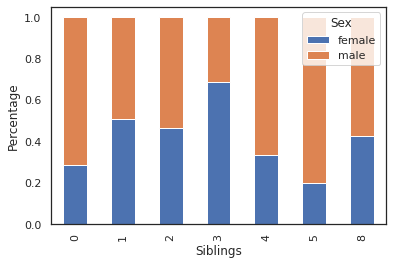

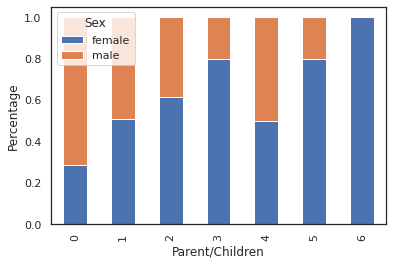

In [35]:
sib = pd.crosstab(train['SibSp'], train['Sex'])
print(sib)
dummy = sib.div(sib.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Siblings')
dummy = plt.ylabel('Percentage')

parch = pd.crosstab(train['Parch'], train['Sex'])
print(parch)
dummy = parch.div(parch.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Parent/Children')
dummy = plt.ylabel('Percentage')

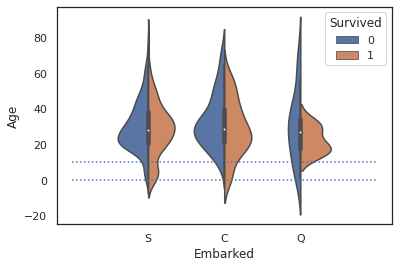

In [36]:
sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train, split=True)
plt.hlines([0,10], xmin=-1, xmax=3, linestyles="dotted")

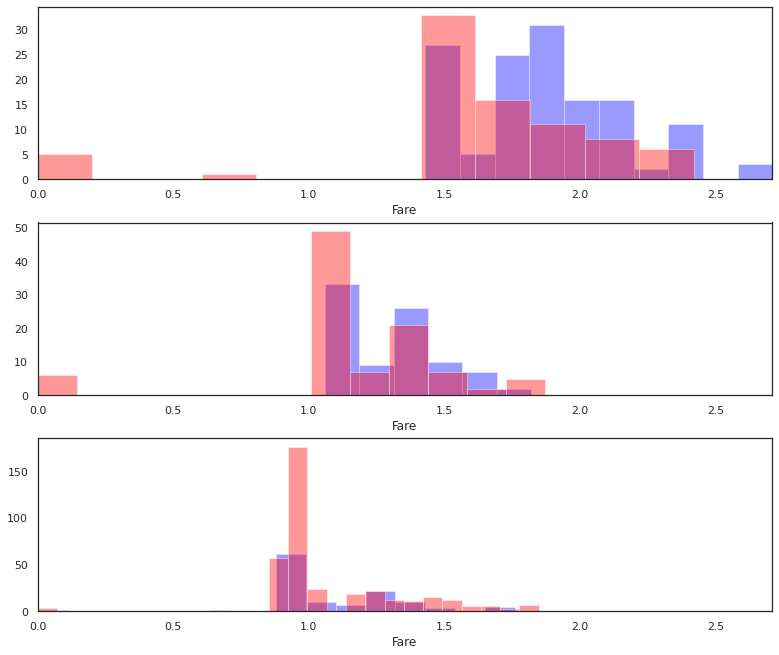

In [37]:
plt.figure(figsize=[12,10])
plt.subplot(311)
ax1 = sns.distplot(np.log10(surv['Fare'][surv['Pclass']==1].dropna().values+1), kde=False, color=surv_col)
ax1 = sns.distplot(np.log10(nosurv['Fare'][nosurv['Pclass']==1].dropna().values+1), kde=False, color=nosurv_col,axlabel='Fare')
ax1.set_xlim(0,np.max(np.log10(train['Fare'].dropna().values)))
plt.subplot(312)
ax2 = sns.distplot(np.log10(surv['Fare'][surv['Pclass']==2].dropna().values+1), kde=False, color=surv_col)
ax2 = sns.distplot(np.log10(nosurv['Fare'][nosurv['Pclass']==2].dropna().values+1), kde=False, color=nosurv_col,axlabel='Fare')
ax2.set_xlim(0,np.max(np.log10(train['Fare'].dropna().values)))
plt.subplot(313)
ax3 = sns.distplot(np.log10(surv['Fare'][surv['Pclass']==3].dropna().values+1), kde=False, color=surv_col)
ax3 = sns.distplot(np.log10(nosurv['Fare'][nosurv['Pclass']==3].dropna().values+1), kde=False, color=nosurv_col,axlabel='Fare')
ax3.set_xlim(0,np.max(np.log10(train['Fare'].dropna().values)))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

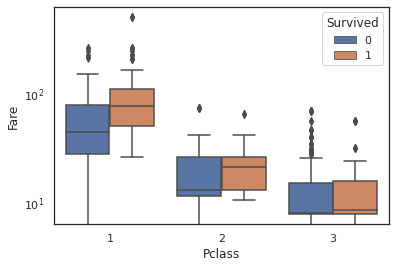

In [39]:
ax = sns.boxplot(x="Pclass", y="Fare", hue="Survived", data=train);
ax.set_yscale('log')

4. Filling in missing values

In [40]:
print(train[train['Embarked'].isnull()])

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


In [41]:
combine.where((combine['Embarked'] !='Q') & (combine['Pclass'] < 1.5) & \
    (combine['Sex'] == "female")).groupby(['Embarked','Pclass','Sex','Parch','SibSp']).size()

Embarked  Pclass  Sex     Parch  SibSp
C         1.0     female  0.0    0.0      30
                                 1.0      20
                          1.0    0.0      10
                                 1.0       6
                          2.0    0.0       2
                                 2.0       2
                          3.0    1.0       1
S         1.0     female  0.0    0.0      20
                                 1.0      20
                                 2.0       3
                          1.0    0.0       7
                                 1.0       6
                          2.0    0.0       4
                                 1.0       5
                                 3.0       3
                          4.0    1.0       1
dtype: int64

In [42]:
train['Embarked'].iloc[61] = "C"
train['Embarked'].iloc[829] = "C"

In [43]:
print(test[test['Fare'].isnull()])

     PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Cabin Embarked  
152   NaN   NaN        S  


In [44]:
print(test[test['Fare'].isnull()])

     PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Cabin Embarked  
152   NaN   NaN        S  


In [45]:
test['Fare'].iloc[152] = combine['Fare'][combine['Pclass'] == 3].dropna().median()
print(test['Fare'].iloc[152])

8.05


5. Derived (engineered) features

In [47]:
combine = pd.concat([train.drop('Survived',1),test])
survived = train['Survived']

combine['Child'] = combine['Age']<=10
combine['Cabin_known'] = combine['Cabin'].isnull() == False
combine['Age_known'] = combine['Age'].isnull() == False
combine['Family'] = combine['SibSp'] + combine['Parch']
combine['Alone']  = (combine['SibSp'] + combine['Parch']) == 0
combine['Large_Family'] = (combine['SibSp']>2) | (combine['Parch']>3)
combine['Deck'] = combine['Cabin'].str[0]
combine['Deck'] = combine['Deck'].fillna(value='U')
combine['Ttype'] = combine['Ticket'].str[0]
combine['Title'] = combine['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
combine['Fare_cat'] = pd.DataFrame(np.floor(np.log10(combine['Fare'] + 1))).astype('int')
combine['Bad_ticket'] = combine['Ttype'].isin(['3','4','5','6','7','8','A','L','W'])
combine['Young'] = (combine['Age']<=30) | (combine['Title'].isin(['Master','Miss','Mlle']))
combine['Shared_ticket'] = np.where(combine.groupby('Ticket')['Name'].transform('count') > 1, 1, 0)
combine['Ticket_group'] = combine.groupby('Ticket')['Name'].transform('count')
combine['Fare_eff'] = combine['Fare']/combine['Ticket_group']
combine['Fare_eff_cat'] = np.where(combine['Fare_eff']>16.0, 2, 1)
combine['Fare_eff_cat'] = np.where(combine['Fare_eff']<8.5,0,combine['Fare_eff_cat'])
test = combine.iloc[len(train):]
train = combine.iloc[:len(train)]
train['Survived'] = survived

surv = train[train['Survived']==1]
nosurv = train[train['Survived']==0]

#### child

Pclass    1    2    3
Child                
False   213  167  447
True      3   17   44
Sex    female  male
Child              
False     283   544
True       31    33


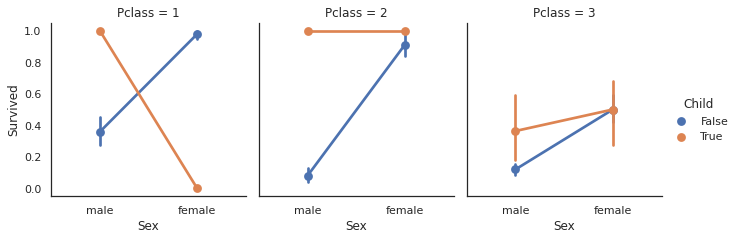

In [48]:
g = sns.factorplot(x="Sex", y="Survived", hue="Child", col="Pclass",
                   data=train, aspect=0.9, size=3.5, ci=95.0)
tab = pd.crosstab(train['Child'], train['Pclass'])
print(tab)
tab = pd.crosstab(train['Child'], train['Sex'])
print(tab)

#### Cabin_known

Survived       0    1
Cabin_known          
False        481  206
True          68  136


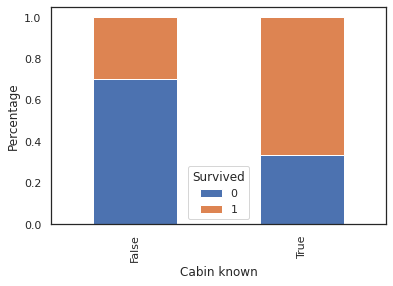

In [49]:
cab = pd.crosstab(train['Cabin_known'], train['Survived'])
print(cab)
dummy = cab.div(cab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Cabin known')
dummy = plt.ylabel('Percentage')

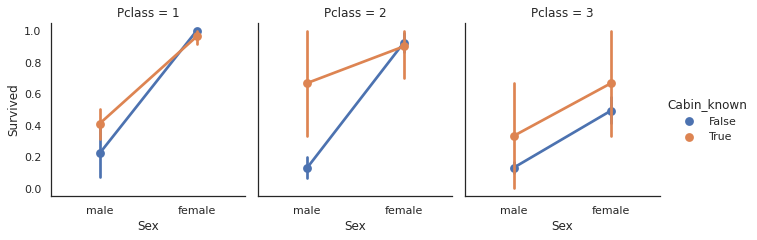

In [50]:
g = sns.factorplot(x="Sex", y="Survived", hue="Cabin_known", col="Pclass",
                   data=train, aspect=0.9, size=3.5, ci=95.0)

#### Deck

Survived    0    1
Deck              
A           8    7
B          12   35
C          24   35
D           8   25
E           8   24
F           5    8
G           2    2
T           1    0
U         481  206


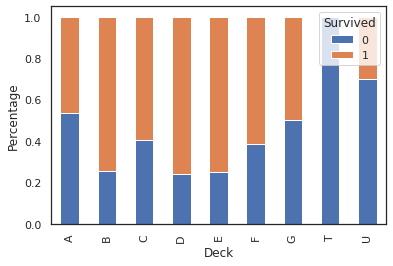

In [51]:
tab = pd.crosstab(train['Deck'], train['Survived'])
print(tab)
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Deck')
dummy = plt.ylabel('Percentage')

In [52]:
stats.binom_test(x=12,n=12+35,p=24/(24.+35.))

0.037415527401218264

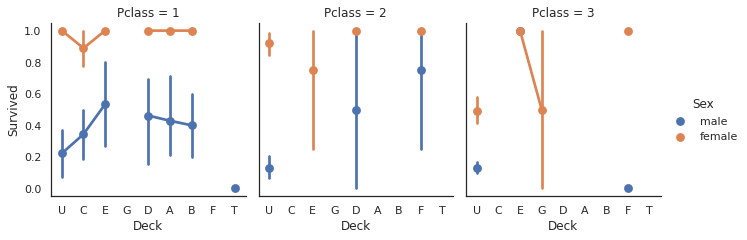

In [53]:
g = sns.factorplot(x="Deck", y="Survived", hue="Sex", col="Pclass",
                   data=train, aspect=0.9, size=3.5, ci=95.0)

#### Ttype and Bad_ticket

In [54]:
print(train['Ttype'].unique())
print(test['Ttype'].unique())

['A' 'P' 'S' '1' '3' '2' 'C' '7' 'W' '4' 'F' 'L' '9' '6' '5' '8']
['3' '2' '7' 'A' '6' 'W' 'S' 'P' 'C' '1' 'F' '4' '9' 'L']


Survived    0   1
Ttype            
1          54  92
2          98  85
3         229  72
4           8   2
5           3   0
6           5   1
7           8   1
8           2   0
9           0   1
A          27   2
C          31  16
F           3   4
L           3   1
P          23  42
S          44  21
W          11   2


<AxesSubplot:xlabel='Ttype', ylabel='Survived'>

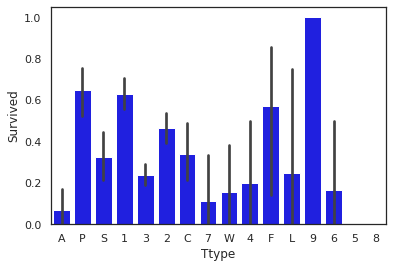

In [55]:
tab = pd.crosstab(train['Ttype'], train['Survived'])
print(tab)
sns.barplot(x="Ttype", y="Survived", data=train, ci=95.0, color="blue")

Survived      0    1
Bad_ticket          
False       253  261
True        296   81


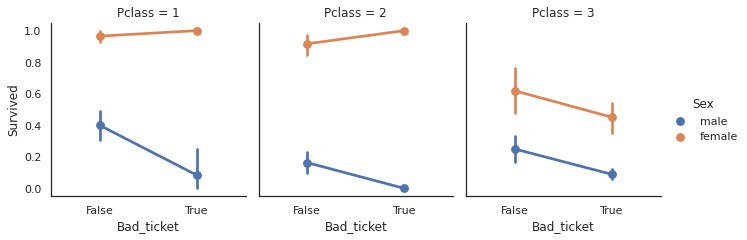

In [56]:
tab = pd.crosstab(train['Bad_ticket'], train['Survived'])
print(tab)
g = sns.factorplot(x="Bad_ticket", y="Survived", hue="Sex", col="Pclass",
                   data=train, aspect=0.9, size=3.5, ci=95.0)

Bad_ticket  False  True 
Deck                    
A              14      1
B              44      3
C              56      3
D              24      9
E              27      5
F               9      4
G               2      2
T               1      0
U             337    350


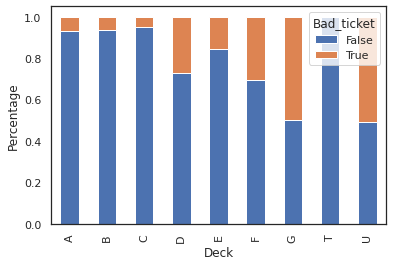

In [57]:
tab = pd.crosstab(train['Deck'], train['Bad_ticket'])
print(tab)
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Deck')
dummy = plt.ylabel('Percentage')

# Age_known

Survived     0    1
Age_known          
False      125   52
True       424  290


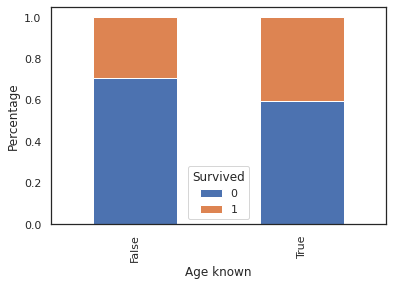

In [58]:
tab = pd.crosstab(train['Age_known'], train['Survived'])
print(tab)
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Age known')
dummy = plt.ylabel('Percentage')

In [59]:
stats.binom_test(x=424,n=424+290,p=125/(125.+52.))

1.5623264542193693e-10

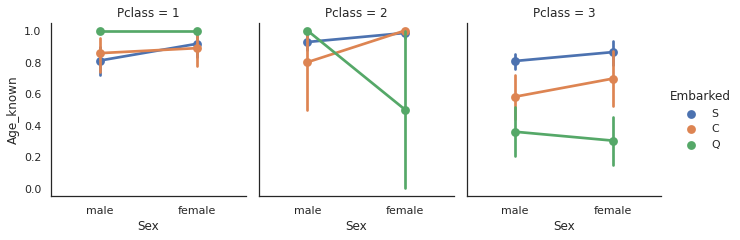

In [60]:
g = sns.factorplot(x="Sex", y="Age_known", hue="Embarked", col="Pclass",
                   data=train, aspect=0.9, size=3.5, ci=95.0)

#### Family

Survived    0    1
Family            
0         374  163
1          72   89
2          43   59
3           8   21
4          12    3
5          19    3
6           8    4
7           6    0
10          7    0


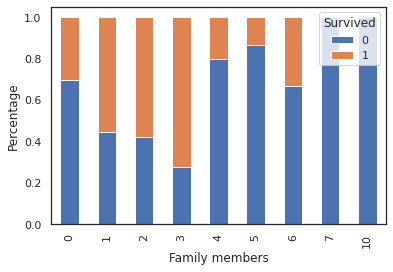

In [61]:
tab = pd.crosstab(train['Family'], train['Survived'])
print(tab)
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Family members')
dummy = plt.ylabel('Percentage')

#### Alone

Survived    0    1
Alone             
False     175  179
True      374  163


<AxesSubplot:xlabel='Alone', ylabel='Survived'>

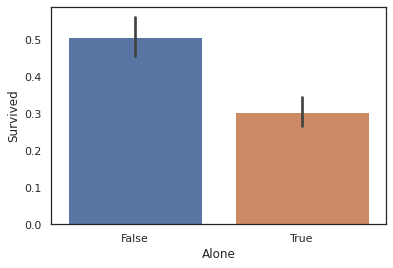

In [62]:
tab = pd.crosstab(train['Alone'], train['Survived'])
print(tab)
sns.barplot('Alone', 'Survived', data=train)

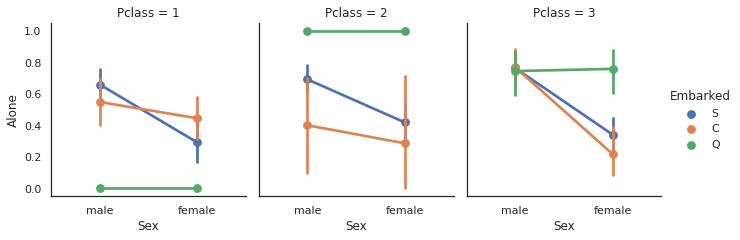

In [63]:
g = sns.factorplot(x="Sex", y="Alone", hue="Embarked", col="Pclass",
                   data=train, aspect=0.9, size=3.5, ci=95.0)

####  Large_Family

Survived        0    1
Large_Family          
False         501  334
True           48    8


<AxesSubplot:xlabel='Large_Family', ylabel='Survived'>

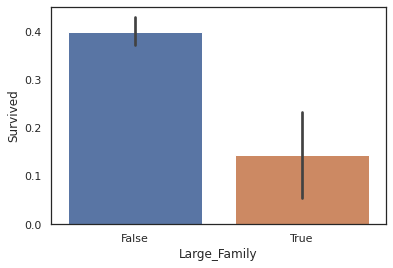

In [64]:
tab = pd.crosstab(train['Large_Family'], train['Survived'])
print(tab)
sns.barplot('Large_Family', 'Survived', data=train)

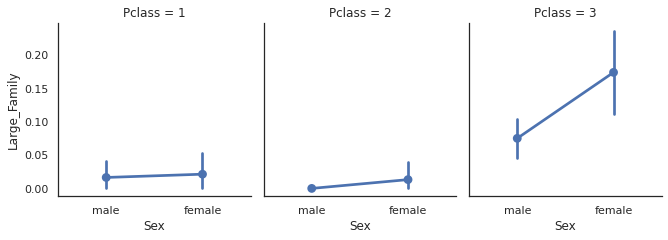

In [65]:
g = sns.factorplot(x="Sex", y="Large_Family", col="Pclass",
                   data=train, aspect=0.9, size=3.5, ci=95.0)

#### Shared_ticket

Survived         0    1
Shared_ticket          
0              351  130
1              198  212


<AxesSubplot:xlabel='Shared_ticket', ylabel='Survived'>

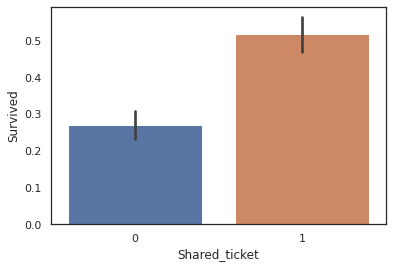

In [66]:
tab = pd.crosstab(train['Shared_ticket'], train['Survived'])
print(tab)
sns.barplot('Shared_ticket', 'Survived', data=train)

Sex            female  male
Shared_ticket              
0                 103   378
1                 211   199


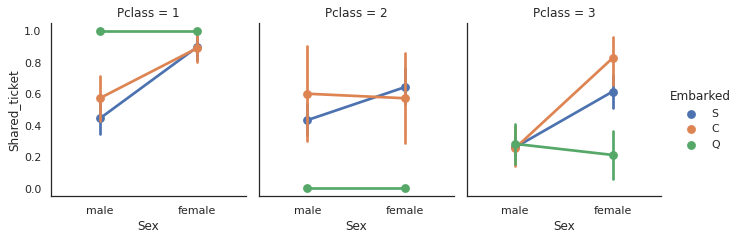

In [67]:
tab = pd.crosstab(train['Shared_ticket'], train['Sex'])
print(tab)
g = sns.factorplot(x="Sex", y="Shared_ticket", hue="Embarked", col="Pclass",
                   data=train, aspect=0.9, size=3.5, ci=95.0)

#### Title

In [68]:
print(combine['Age'].groupby(combine['Title']).count())
print(combine['Age'].groupby(combine['Title']).mean())

print("There are %i unique titles in total."%(len(combine['Title'].unique())))

Title
Capt              1
Col               4
Don               1
Dona              1
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           53
Miss            210
Mlle              2
Mme               1
Mr              581
Mrs             170
Ms                1
Rev               8
Sir               1
the Countess      1
Name: Age, dtype: int64
Title
Capt            70.000000
Col             54.000000
Don             40.000000
Dona            39.000000
Dr              43.571429
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           5.482642
Miss            21.774238
Mlle            24.000000
Mme             24.000000
Mr              32.252151
Mrs             36.994118
Ms              28.000000
Rev             41.250000
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64
There are 18 unique titles in total.


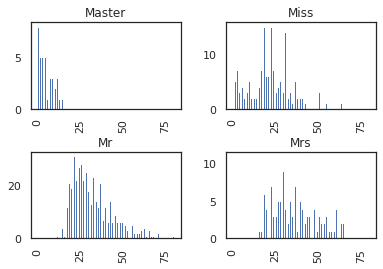

In [69]:
dummy = combine[combine['Title'].isin(['Mr','Miss','Mrs','Master'])]
foo = dummy['Age'].hist(by=dummy['Title'], bins=np.arange(0,81,1))

Survived    0    1
Young             
False     284  127
True      265  215


<AxesSubplot:xlabel='Young', ylabel='Survived'>

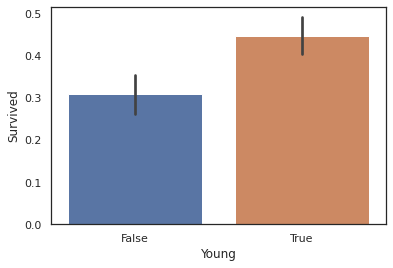

In [70]:
tab = pd.crosstab(train['Young'], train['Survived'])
print(tab)
sns.barplot('Young', 'Survived', data=train)

Pclass    1    2    3
Young                
False   135   78  198
True     81  106  293


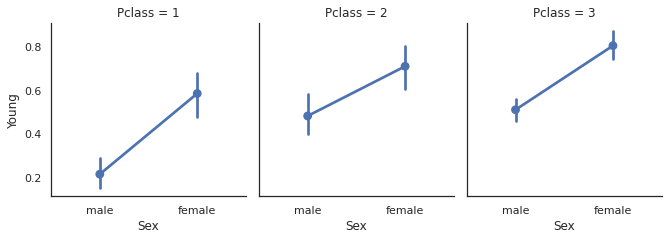

In [71]:
tab = pd.crosstab(train['Young'], train['Pclass'])
print(tab)
g = sns.factorplot(x="Sex", y="Young", col="Pclass",
                   data=train, aspect=0.9, size=3.5, ci=95.0)

#### Fare_cat

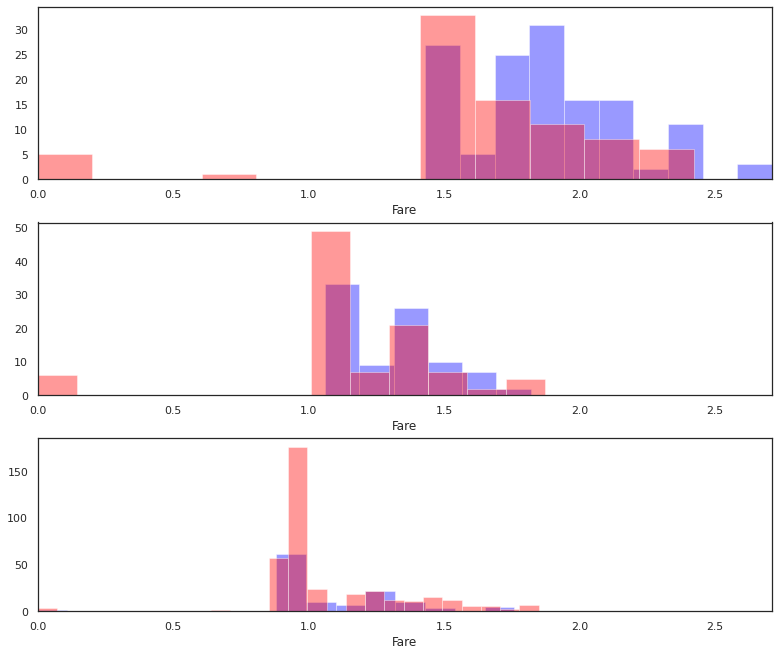

In [72]:
plt.figure(figsize=[12,10])
plt.subplot(311)
ax1 = sns.distplot(np.log10(surv['Fare'][surv['Pclass']==1].dropna().values+1), kde=False, color=surv_col)
ax1 = sns.distplot(np.log10(nosurv['Fare'][nosurv['Pclass']==1].dropna().values+1), kde=False, color=nosurv_col,axlabel='Fare')
ax1.set_xlim(0,np.max(np.log10(train['Fare'].dropna().values+1)))
plt.subplot(312)
ax2 = sns.distplot(np.log10(surv['Fare'][surv['Pclass']==2].dropna().values+1), kde=False, color=surv_col)
ax2 = sns.distplot(np.log10(nosurv['Fare'][nosurv['Pclass']==2].dropna().values+1), kde=False, color=nosurv_col,axlabel='Fare')
ax2.set_xlim(0,np.max(np.log10(train['Fare'].dropna().values+1)))
plt.subplot(313)
ax3 = sns.distplot(np.log10(surv['Fare'][surv['Pclass']==3].dropna().values+1), kde=False, color=surv_col)
ax3 = sns.distplot(np.log10(nosurv['Fare'][nosurv['Pclass']==3].dropna().values+1), kde=False, color=nosurv_col,axlabel='Fare')
ax3.set_xlim(0,np.max(np.log10(train['Fare'].dropna().values+1)))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

In [73]:
pd.DataFrame(np.floor(np.log10(train['Fare'] + 1))).astype('int').head(5)

,Fare
0,0
1,1
2,0
3,1
4,0


Survived    0    1
Fare_cat          
0         249   62
1         286  241
2          14   39


<AxesSubplot:xlabel='Fare_cat', ylabel='Survived'>

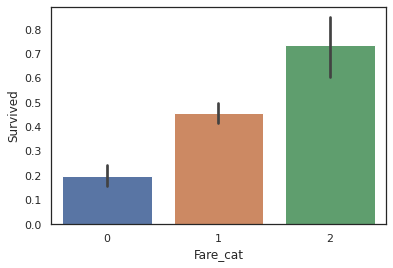

In [74]:
tab = pd.crosstab(train['Fare_cat'], train['Survived'])
print(tab)
sns.barplot('Fare_cat', 'Survived', data=train)

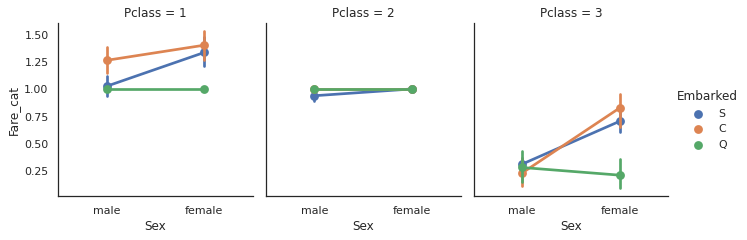

In [75]:
g = sns.factorplot(x="Sex", y="Fare_cat", hue="Embarked", col="Pclass",
                   data=train, aspect=0.9, size=3.5, ci=95.0)

#### Fare_eff_cat

2

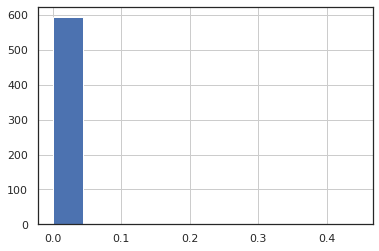

In [76]:
combine.groupby('Ticket')['Fare'].transform('std').hist()
np.sum(combine.groupby('Ticket')['Fare'].transform('std') > 0)

In [77]:
combine.iloc[np.where(combine.groupby('Ticket')['Fare'].transform('std') > 0)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Deck,Ttype,Title,Fare_cat,Bad_ticket,Young,Shared_ticket,Ticket_group,Fare_eff,Fare_eff_cat
138,139,3,"Osen, Mr. Olaf Elon",male,16.0,0,0,7534,9.2167,NaN,...,U,7,Mr,1,True,True,1,2,4.60835,0
876,877,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,...,U,7,Mr,1,True,True,1,2,4.92290,0


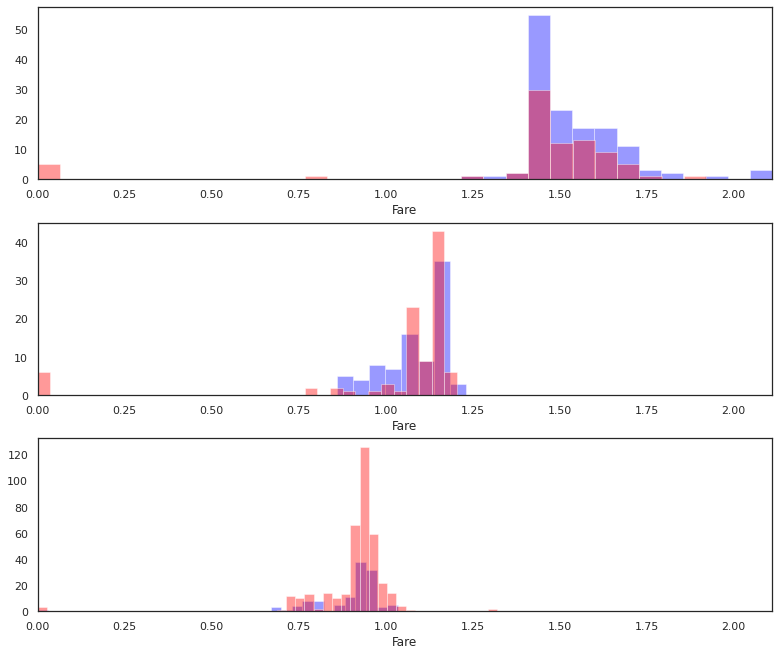

In [78]:
plt.figure(figsize=[12,10])
plt.subplot(311)
ax1 = sns.distplot(np.log10(surv['Fare_eff'][surv['Pclass']==1].dropna().values+1), kde=False, color=surv_col)
ax1 = sns.distplot(np.log10(nosurv['Fare_eff'][nosurv['Pclass']==1].dropna().values+1), kde=False, color=nosurv_col,axlabel='Fare')
ax1.set_xlim(0,np.max(np.log10(train['Fare_eff'].dropna().values+1)))
plt.subplot(312)
ax2 = sns.distplot(np.log10(surv['Fare_eff'][surv['Pclass']==2].dropna().values+1), kde=False, color=surv_col)
ax2 = sns.distplot(np.log10(nosurv['Fare_eff'][nosurv['Pclass']==2].dropna().values+1), kde=False, color=nosurv_col,axlabel='Fare')
ax2.set_xlim(0,np.max(np.log10(train['Fare_eff'].dropna().values+1)))
plt.subplot(313)
ax3 = sns.distplot(np.log10(surv['Fare_eff'][surv['Pclass']==3].dropna().values+1), kde=False, color=surv_col)
ax3 = sns.distplot(np.log10(nosurv['Fare_eff'][nosurv['Pclass']==3].dropna().values+1), kde=False, color=nosurv_col,axlabel='Fare')
ax3.set_xlim(0,np.max(np.log10(train['Fare_eff'].dropna().values+1)))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

In [79]:
print(combine[combine['Fare']>1].groupby('Pclass')['Fare'].std())
print(combine[combine['Fare_eff']>1].groupby('Pclass')['Fare_eff'].std())

Pclass
1    80.259713
2    13.382064
3    11.476600
Name: Fare, dtype: float64
Pclass
1    14.675124
2     2.031927
3     1.366691
Name: Fare_eff, dtype: float64


In [80]:
combine[(combine['Pclass']==1) & (combine['Fare_eff']>0) & (combine['Fare_eff']<10)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Deck,Ttype,Title,Fare_cat,Bad_ticket,Young,Shared_ticket,Ticket_group,Fare_eff,Fare_eff_cat
872,873,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0,B51 B53 B55,...,B,6,Mr,0,True,False,0,1,5.0,0


In [81]:
combine[(combine['Pclass']==3) & (np.log10(combine['Fare_eff'])>1.2)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Deck,Ttype,Title,Fare_cat,Bad_ticket,Young,Shared_ticket,Ticket_group,Fare_eff,Fare_eff_cat
451,452,3,"Hagland, Mr. Ingvald Olai Olsen",male,NaN,1,0,65303,19.9667,NaN,...,U,6,Mr,1,True,False,0,1,19.9667,2
490,491,3,"Hagland, Mr. Konrad Mathias Reiersen",male,NaN,1,0,65304,19.9667,NaN,...,U,6,Mr,1,True,False,0,1,19.9667,2


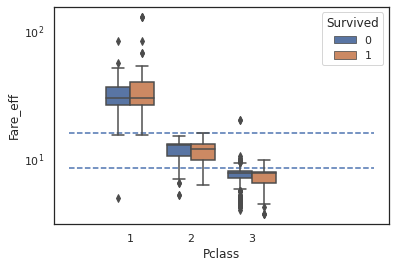

In [82]:
ax = sns.boxplot(x="Pclass", y="Fare_eff", hue="Survived", data=train)
ax.set_yscale('log')
ax.hlines([8.5,16],-1,4, linestyles='dashed')

Survived        0    1
Fare_eff_cat          
0             346  120
1             128   87
2              75  135


<AxesSubplot:xlabel='Fare_eff_cat', ylabel='Survived'>

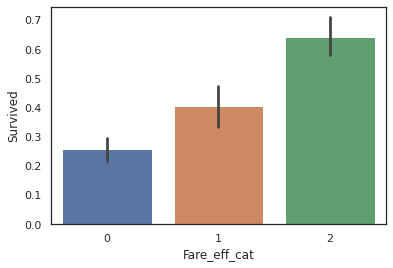

In [83]:
tab = pd.crosstab(train['Fare_eff_cat'], train['Survived'])
print(tab)
sns.barplot('Fare_eff_cat', 'Survived', data=train)

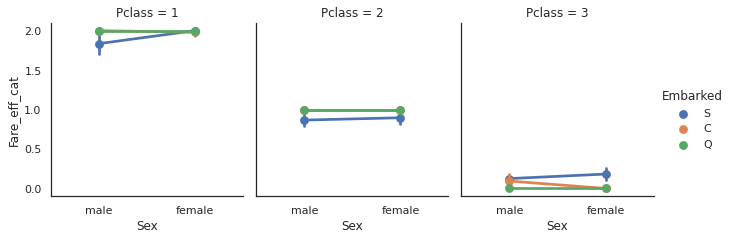

In [84]:
g = sns.factorplot(x="Sex", y="Fare_eff_cat", hue="Embarked", col="Pclass",
                   data=train, aspect=0.9, size=3.5, ci=95.0)

6. Preparing for modelling

In [85]:
combine = pd.concat([train.drop('Survived',1),test])
survived = train['Survived']

combine["Sex"] = combine["Sex"].astype("category")
combine["Sex"].cat.categories = [0,1]
combine["Sex"] = combine["Sex"].astype("int")
combine["Embarked"] = combine["Embarked"].astype("category")
combine["Embarked"].cat.categories = [0,1,2]
combine["Embarked"] = combine["Embarked"].astype("int")
combine["Deck"] = combine["Deck"].astype("category")
combine["Deck"].cat.categories = [0,1,2,3,4,5,6,7,8]
combine["Deck"] = combine["Deck"].astype("int")

test = combine.iloc[len(train):]
train = combine.iloc[:len(train)]
train['Survived'] = survived

train.loc[:,["Sex","Embarked"]].head()

,Sex,Embarked
0,1,2
1,0,0
2,0,2
3,0,2
4,1,2


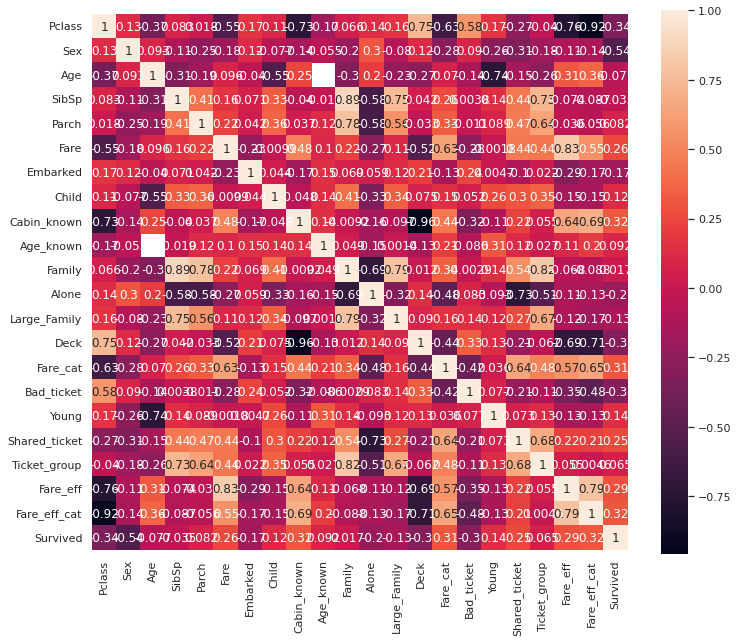

In [86]:
ax = plt.subplots( figsize =( 12 , 10 ) )
foo = sns.heatmap(train.drop('PassengerId',axis=1).corr(), vmax=1.0, square=True, annot=True)

7. Modelling

#### Splitting the train sample into two sub-samples: training and testing

In [87]:
training, testing = train_test_split(train, test_size=0.2, random_state=0)
print("Total sample size = %i; training sample size = %i, testing sample size = %i"\
     %(train.shape[0],training.shape[0],testing.shape[0]))

Total sample size = 891; training sample size = 712, testing sample size = 179


#### Test and select the model features

In [88]:
cols = ['Sex','Pclass','Cabin_known','Large_Family','Parch',
        'SibSp','Young','Alone','Shared_ticket','Child']
tcols = np.append(['Survived'],cols)

df = training.loc[:,tcols].dropna()
X = df.loc[:,cols]
y = np.ravel(df.loc[:,['Survived']])

In [89]:
clf_log = LogisticRegression()
clf_log = clf_log.fit(X,y)
score_log = clf_log.score(X,y)
print(score_log)

0.8174157303370787


In [90]:
pd.DataFrame(list(zip(X.columns, np.transpose(clf_log.coef_))))

,0,1
0,Sex,[-2.5070940161519175]
1,Pclass,[-0.713491940456144]
2,Cabin_known,[0.4332184617925164]
3,Large_Family,[-1.2066917803860708]
4,Parch,[-0.08035684808852983]
5,SibSp,[-0.3305699798076425]
6,Young,[0.420624447927108]
7,Alone,[-0.32302800745801835]
8,Shared_ticket,[-0.007634983541099964]
9,Child,[1.4848921724321635]


#### Run and describe several different classifiers

In [91]:
cols = ['Sex','Pclass','Cabin_known','Large_Family','Shared_ticket','Young','Alone','Child']
tcols = np.append(['Survived'],cols)

df = training.loc[:,tcols].dropna()
X = df.loc[:,cols]
y = np.ravel(df.loc[:,['Survived']])

df_test = testing.loc[:,tcols].dropna()
X_test = df_test.loc[:,cols]
y_test = np.ravel(df_test.loc[:,['Survived']])

#### LogisticRegression

In [92]:
clf_log = LogisticRegression()
clf_log = clf_log.fit(X,y)
score_log = cross_val_score(clf_log, X, y, cv=5).mean()
print(score_log)

0.8075839653304442


#### Perceptron

In [93]:
clf_pctr = Perceptron(
    class_weight='balanced'
    )
clf_pctr = clf_pctr.fit(X,y)
score_pctr = cross_val_score(clf_pctr, X, y, cv=5).mean()
print(score_pctr)

0.6073672806067172


#### K Nearest Neighbours:

In [94]:
clf_knn = KNeighborsClassifier(
    n_neighbors=10,
    weights='distance'
    )
clf_knn = clf_knn.fit(X,y)
score_knn = cross_val_score(clf_knn, X, y, cv=5).mean()
print(score_knn)

0.8047670639219936


#### Support Vector Machine:

In [95]:
clf_svm = svm.SVC(
    class_weight='balanced'
    )
clf_svm.fit(X, y)
score_svm = cross_val_score(clf_svm, X, y, cv=5).mean()
print(score_svm)

0.8216487737614498


#### Naive Bayes

In [96]:
clf_bay = GaussianNB()
clf_bay.fit(X,y)
score_bay = cross_val_score(clf_bay, X, y, cv=5).mean()
print(score_bay)

0.7879936964444008


#### Bagging:

In [97]:
bagging = BaggingClassifier(
    KNeighborsClassifier(
        n_neighbors=2,
        weights='distance'
        ),
    oob_score=True,
    max_samples=0.5,
    max_features=1.0
    )
clf_bag = bagging.fit(X,y)
score_bag = clf_bag.oob_score_
print(score_bag)

0.8061797752808989


#### Decision Tree:

In [98]:
clf_tree = tree.DecisionTreeClassifier(
    #max_depth=3,\
    class_weight="balanced",\
    min_weight_fraction_leaf=0.01\
    )
clf_tree = clf_tree.fit(X,y)
score_tree = cross_val_score(clf_tree, X, y, cv=5).mean()
print(score_tree)

0.8118290160543682


#### Random Forest

In [99]:
clf_rf = RandomForestClassifier(
    n_estimators=1000, \
    max_depth=None, \
    min_samples_split=10 \
    #class_weight="balanced", \
    #min_weight_fraction_leaf=0.02 \
    )
clf_rf = clf_rf.fit(X,y)
score_rf = cross_val_score(clf_rf, X, y, cv=5).mean()
print(score_rf)

0.8230178272431793


#### Extremely Randomised Trees

In [100]:
clf_ext = ExtraTreesClassifier(
    max_features='auto',
    bootstrap=True,
    oob_score=True,
    n_estimators=1000,
    max_depth=None,
    min_samples_split=10
    #class_weight="balanced",
    #min_weight_fraction_leaf=0.02
    )
clf_ext = clf_ext.fit(X,y)
score_ext = cross_val_score(clf_ext, X, y, cv=5).mean()
print(score_ext)

0.821619225844578


#### Gradient Boosting:

In [101]:
import warnings
warnings.filterwarnings("ignore")

clf_gb = GradientBoostingClassifier(
            #loss='exponential',
            n_estimators=1000,
            learning_rate=0.1,
            max_depth=3,
            subsample=0.5,
            random_state=0).fit(X, y)
clf_gb.fit(X,y)
score_gb = cross_val_score(clf_gb, X, y, cv=5).mean()
print(score_gb)

0.8117797695262485


#### Ada Boost:

In [102]:
clf_ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
clf_ada.fit(X,y)
score_ada = cross_val_score(clf_ada, X, y, cv=5).mean()
print(score_ada)

0.810420565350143


#### eXtreme Gradient Boosting - XGBoost:

In [103]:
clf_xgb = xgb.XGBClassifier(
    max_depth=2,
    n_estimators=500,
    subsample=0.5,
    learning_rate=0.1
    )
clf_xgb.fit(X,y)
score_xgb = cross_val_score(clf_xgb, X, y, cv=5).mean()
print(score_xgb)

[06:33:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:36:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:39:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:41:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

#### LightGBM:

In [104]:
clf_lgb = lgb.LGBMClassifier(
    max_depth=2,
    n_estimators=500,
    subsample=0.5,
    learning_rate=0.1
    )
clf_lgb.fit(X,y)
score_lgb = cross_val_score(clf_lgb, X, y, cv=5).mean()
print(score_lgb)

0.814606520240323


#### Examining/Optimising one classifier in more detail:

In [105]:
clf_ext = ExtraTreesClassifier(max_features='auto',bootstrap=True,oob_score=True)
param_grid = { "criterion" : ["gini", "entropy"],
              "min_samples_leaf" : [1, 5, 10],
              "min_samples_split" : [8, 10, 12],
              "n_estimators": [20, 50, 100]}
gs = GridSearchCV(estimator=clf_ext, param_grid=param_grid, scoring='accuracy', cv=3)
gs = gs.fit(X,y)
print(gs.best_score_)
print(gs.best_params_)

0.8202437092980652
{'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 20}


In [106]:
clf_ext = ExtraTreesClassifier(
    max_features='auto',
    bootstrap=True,
    oob_score=True,
    criterion='gini',
    min_samples_leaf=5,
    min_samples_split=8,
    n_estimators=50
    )
clf_ext = clf_ext.fit(X,y)
score_ext = clf_ext.score(X,y)
print(score_ext)
pd.DataFrame(list(zip(X.columns, np.transpose(clf_ext.feature_importances_))) \
            ).sort_values(1, ascending=False)

0.8328651685393258


,0,1
0,Sex,0.529196
1,Pclass,0.154728
2,Cabin_known,0.083619
3,Large_Family,0.065581
7,Child,0.048876
5,Young,0.047682
4,Shared_ticket,0.038948
6,Alone,0.031369


In [107]:
def show_confusion_matrix(cnf_matrix, class_labels):
    plt.matshow(cnf_matrix,cmap=plt.cm.YlGn,alpha=0.7)
    ax = plt.gca()
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks(range(0,len(class_labels)))
    ax.set_xticklabels(class_labels,rotation=45)
    ax.set_ylabel('Actual Label', fontsize=16, rotation=90)
    ax.set_yticks(range(0,len(class_labels)))
    ax.set_yticklabels(class_labels)
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()

    for row in range(len(cnf_matrix)):
        for col in range(len(cnf_matrix[row])):
            ax.text(col, row, cnf_matrix[row][col], va='center', ha='center', fontsize=16)

# sklearn example code
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = ["Dead", "Alive"]
cnf_matrix = confusion_matrix(clf_ext.predict(X_test),y_test)

# from: http://notmatthancock.github.io/2015/10/28/confusion-matrix.html
def show_confusion_matrix2(C,class_labels=['0','1']):
    """
    C: ndarray, shape (2,2) as given by scikit-learn confusion_matrix function
    class_labels: list of strings, default simply labels 0 and 1.

    Draws confusion matrix with associated metrics.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    assert C.shape == (2,2), "Confusion matrix should be from binary classification only."
    
    # true negative, false positive, etc...
    tn = C[0,0]; fp = C[0,1]; fn = C[1,0]; tp = C[1,1];

    NP = fn+tp # Num positive examples
    NN = tn+fp # Num negative examples
    N  = NP+NN

    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111)
    ax.imshow(C, interpolation='nearest', cmap=plt.cm.gray)

    # Draw the grid boxes
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(2.5,-0.5)
    ax.plot([-0.5,2.5],[0.5,0.5], '-k', lw=2)
    ax.plot([-0.5,2.5],[1.5,1.5], '-k', lw=2)
    ax.plot([0.5,0.5],[-0.5,2.5], '-k', lw=2)
    ax.plot([1.5,1.5],[-0.5,2.5], '-k', lw=2)

    # Set xlabels
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks([0,1,2])
    ax.set_xticklabels(class_labels + [''])
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    # These coordinate might require some tinkering. Ditto for y, below.
    ax.xaxis.set_label_coords(0.34,1.06)

    # Set ylabels
    ax.set_ylabel('True Label', fontsize=16, rotation=90)
    ax.set_yticklabels(class_labels + [''],rotation=90)
    ax.set_yticks([0,1,2])
    ax.yaxis.set_label_coords(-0.09,0.65)


    # Fill in initial metrics: tp, tn, etc...
    ax.text(0,0,
            'True Neg: %d\n(Num Neg: %d)'%(tn,NN),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,1,
            'False Neg: %d'%fn,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,0,
            'False Pos: %d'%fp,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    ax.text(1,1,
            'True Pos: %d\n(Num Pos: %d)'%(tp,NP),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    # Fill in secondary metrics: accuracy, true pos rate, etc...
    ax.text(2,0,
            'False Pos Rate: %.2f'%(fp / (fp+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,1,
            'True Pos Rate: %.2f'%(tp / (tp+fn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,2,
            'Accuracy: %.2f'%((tp+tn+0.)/N),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,2,
            'Neg Pre Val: %.2f'%(1-fn/(fn+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,2,
            'Pos Pred Val: %.2f'%(tp/(tp+fp+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    plt.tight_layout()
    plt.show()

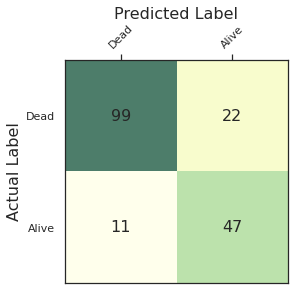

In [108]:
show_confusion_matrix(cnf_matrix,class_names)

#### Model validation

In [109]:
clf = clf_ext
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print("Mean score = %.3f, Std deviation = %.3f"%(np.mean(scores),np.std(scores)))

[0.76223776 0.84615385 0.79577465 0.80985915 0.83098592]
Mean score = 0.809, Std deviation = 0.029


In [110]:
score_ext_test = clf_ext.score(X_test,y_test)
print(score_ext_test)

0.8156424581005587


#### Ranking of models and features

In [111]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Gradient Boosting', 'Bagging KNN', 
              'Decision Tree','XGBoost','LightGBM','ExtraTree','Perceptron', 'Naive Bayes'],
    'Score': [score_svm, score_knn, score_log, score_rf, score_gb, score_bag,
              score_tree,score_xgb,score_lgb,score_ext,score_pctr, score_bay]})
models.sort_values(by='Score', ascending=False)

,Model,Score
9,ExtraTree,0.832865
3,Random Forest,0.823018
0,Support Vector Machines,0.821649
7,XGBoost,0.817384
8,LightGBM,0.814607
6,Decision Tree,0.811829
4,Gradient Boosting,0.811780
2,Logistic Regression,0.807584
5,Bagging KNN,0.806180
1,KNN,0.804767


In [112]:
summary = pd.DataFrame(list(zip(X.columns, \
    np.transpose(clf_tree.feature_importances_), \
    np.transpose(clf_rf.feature_importances_), \
    np.transpose(clf_ext.feature_importances_), \
    np.transpose(clf_gb.feature_importances_), \
    np.transpose(clf_ada.feature_importances_), \
    np.transpose(clf_xgb.feature_importances_), \
    np.transpose(clf_lgb.feature_importances_), \
    )), columns=['Feature','Tree','RF','Extra','GB','Ada','XGBoost','LightGBM'])
  
summary['Median'] = summary.median(1)
summary.sort_values('Median', ascending=False)

,Feature,Tree,RF,Extra,GB,Ada,XGBoost,LightGBM,Median
0,Sex,0.633335,0.494999,0.529196,0.251307,0.1575,0.253650,347,0.494999
1,Pclass,0.115488,0.158695,0.154728,0.223802,0.1600,0.129584,266,0.158695
3,Large_Family,0.096111,0.061863,0.065581,0.053671,0.1450,0.108027,133,0.096111
5,Young,0.019033,0.049662,0.047682,0.101091,0.0925,0.097547,106,0.092500
4,Shared_ticket,0.006158,0.047375,0.038948,0.112998,0.1075,0.088145,75,0.088145
2,Cabin_known,0.067423,0.085373,0.083619,0.118492,0.0200,0.107012,178,0.085373
6,Alone,0.012482,0.042538,0.031369,0.073690,0.1700,0.086008,85,0.073690
7,Child,0.049970,0.059493,0.048876,0.064950,0.1475,0.130026,298,0.064950


#### Stacking / Ensemble methods

In [114]:
clf_vote = VotingClassifier(
    estimators=[
        #('tree', clf_tree),
        ('knn', clf_knn),
        ('svm', clf_svm),
        ('extra', clf_ext),
       #('gb', clf_gb),
        ('xgb', clf_xgb),
        ('percep', clf_pctr),
        ('logistic', clf_log),
        #('RF', clf_rf),
        ],
    weights=[2,2,3,3,1,2],
    voting='hard')
clf_vote.fit(X,y)

scores = cross_val_score(clf_vote, X, y, cv=5, scoring='accuracy')
print("Voting: Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[07:36:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:39:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:42:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:45:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [115]:
# adjust these methods to my notation:
train = X

# training and train/test split parameters
ntrain = train.shape[0]
ntest = test.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(n_splits=NFOLDS, random_state=SEED)

# Class to extend the Sklearn classifier; this basically unifies the way we call each classifier 
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)

In [116]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))
    
    # split data in NFOLDS training vs testing samples
    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        # select train and test sample
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]
        
        # train classifier on training sample
        clf.train(x_tr, y_tr)
        
        # predict classifier for testing sample
        oof_train[test_index] = clf.predict(x_te)
        # predict classifier for original test sample
        oof_test_skf[i, :] = clf.predict(x_test)
    
    # take the median of all NFOLD test sample predictions
    # (changed from mean to preserve binary classification)
    oof_test[:] = np.median(oof_test_skf,axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [117]:
rf_params = {
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
}

# Extra Trees Parameters
et_params = {
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025
    }

In [118]:
# Create objects for each classifier
rf = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
et = SklearnHelper(clf=ExtraTreesClassifier, seed=SEED, params=et_params)
ada = SklearnHelper(clf=AdaBoostClassifier, seed=SEED, params=ada_params)
gb = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gb_params)
svc = SklearnHelper(clf=svm.SVC, seed=SEED, params=svc_params)

In [119]:
y_train = y
train = X
foo = test.loc[:,cols]
x_train = train.values 
x_test = foo.values

In [120]:
et_oof_train, et_oof_test = get_oof(et, x_train, y_train, x_test) # Extra Trees
rf_oof_train, rf_oof_test = get_oof(rf,x_train, y_train, x_test) # Random Forest
ada_oof_train, ada_oof_test = get_oof(ada, x_train, y_train, x_test) # AdaBoost 
gb_oof_train, gb_oof_test = get_oof(gb,x_train, y_train, x_test) # Gradient Boost
svc_oof_train, svc_oof_test = get_oof(svc,x_train, y_train, x_test) # Support Vector Classifier

print("Training is complete")

Training is complete


In [121]:
base_predictions_train = pd.DataFrame( {'RandomForest': rf_oof_train.ravel(),
     'ExtraTrees': et_oof_train.ravel(),
     'AdaBoost': ada_oof_train.ravel(),
      'SVM' : svc_oof_train.ravel(),
      'GradientBoost': gb_oof_train.ravel()
    })
base_predictions_train.head()

,RandomForest,ExtraTrees,AdaBoost,SVM,GradientBoost
0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


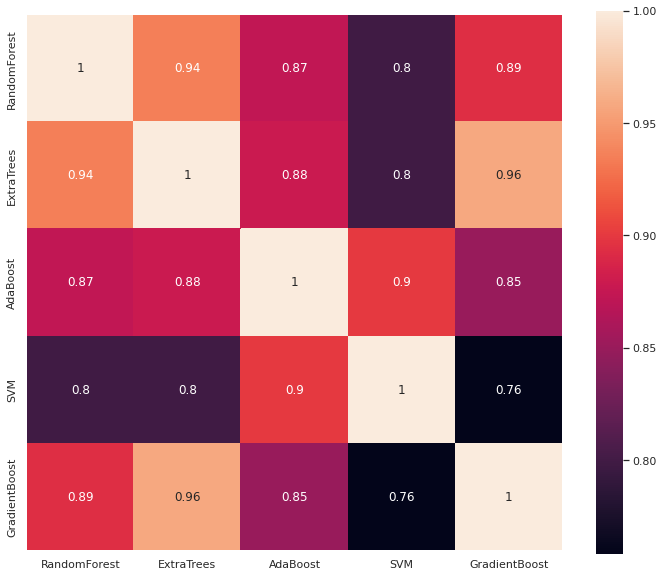

In [122]:
plt.figure(figsize=(12,10))
foo = sns.heatmap(base_predictions_train.corr(), vmax=1.0, square=True, annot=True)

In [123]:
x_train = np.concatenate(( et_oof_train, rf_oof_train, ada_oof_train, gb_oof_train, svc_oof_train), axis=1)
x_test = np.concatenate(( et_oof_test, rf_oof_test, ada_oof_test, gb_oof_test, svc_oof_test), axis=1)

In [124]:
x_train

array([[1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 1.],
       [0., 0., 0., 0., 0.]])

In [125]:
clf_stack = xgb.XGBClassifier(
    #learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 scale_pos_weight=1)
clf_stack = clf_stack.fit(x_train, y_train)
stack_pred = clf_stack.predict(x_test)

[07:54:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
scores = cross_val_score(clf_stack, x_train, y_train, cv=5)
print(scores)
print("Mean score = %.3f, Std deviation = %.3f"%(np.mean(scores),np.std(scores)))

8. Preparing our prediction for submission

In [126]:
clf = clf_vote
df2 = test.loc[:,cols].fillna(method='pad')
surv_pred = clf.predict(df2)

In [127]:
submit = pd.DataFrame({'PassengerId' : test.loc[:,'PassengerId'],
                       #'Survived': surv_pred.T})
                       'Survived': stack_pred.T})
submit.to_csv("./submit.csv", index=False)
#submit.to_csv("submit.csv", index=False)

In [128]:
submit.shape

(418, 2)